In [1]:
import pandas as pd
import numpy as np
import re
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
import matplotlib as mpl


In [2]:
%%time
train=pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/train.csv",encoding='utf-8')
test=pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/test.csv",encoding='utf-8')

sample_sub=pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/sample_submission.csv",encoding='utf-8')

history_trans=pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/historical_transactions.csv",encoding='utf-8')
new_merchant=pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/new_merchant_transactions.csv",encoding='utf-8')

merchant=pd.read_csv("C:/Users/오원석/user_name/elo-merchant-category-recommendation/merchants.csv",encoding='utf-8')

Wall time: 52.2 s


In [3]:
train_dic=pd.read_excel("C:/Users/오원석/user_name/elo-merchant-category-recommendation/Data_Dictionary.xlsx",sheet_name = 'train')
his_dic=pd.read_excel("C:/Users/오원석/user_name/elo-merchant-category-recommendation/Data_Dictionary.xlsx",sheet_name = 'history')
new_merchant_dic=pd.read_excel("C:/Users/오원석/user_name/elo-merchant-category-recommendation/Data_Dictionary.xlsx",sheet_name = 'new_merchant_period')
merchant_dic=pd.read_excel("C:/Users/오원석/user_name/elo-merchant-category-recommendation/Data_Dictionary.xlsx",sheet_name = 'merchant')

In [4]:
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [5]:
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


[Text(0, 0, '2011-11'),
 Text(0, 0, '2011-12'),
 Text(0, 0, '2012-02'),
 Text(0, 0, '2012-03'),
 Text(0, 0, '2012-04'),
 Text(0, 0, '2012-05'),
 Text(0, 0, '2012-06'),
 Text(0, 0, '2012-07'),
 Text(0, 0, '2012-08'),
 Text(0, 0, '2012-09'),
 Text(0, 0, '2012-10'),
 Text(0, 0, '2012-11'),
 Text(0, 0, '2012-12'),
 Text(0, 0, '2013-01'),
 Text(0, 0, '2013-02'),
 Text(0, 0, '2013-03'),
 Text(0, 0, '2013-04'),
 Text(0, 0, '2013-05'),
 Text(0, 0, '2013-06'),
 Text(0, 0, '2013-07'),
 Text(0, 0, '2013-08'),
 Text(0, 0, '2013-09'),
 Text(0, 0, '2013-10'),
 Text(0, 0, '2013-11'),
 Text(0, 0, '2013-12'),
 Text(0, 0, '2014-01'),
 Text(0, 0, '2014-02'),
 Text(0, 0, '2014-03'),
 Text(0, 0, '2014-04'),
 Text(0, 0, '2014-05'),
 Text(0, 0, '2014-06'),
 Text(0, 0, '2014-07'),
 Text(0, 0, '2014-08'),
 Text(0, 0, '2014-09'),
 Text(0, 0, '2014-10'),
 Text(0, 0, '2014-11'),
 Text(0, 0, '2014-12'),
 Text(0, 0, '2015-01'),
 Text(0, 0, '2015-02'),
 Text(0, 0, '2015-03'),
 Text(0, 0, '2015-04'),
 Text(0, 0, '201

C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0, flags=flags)


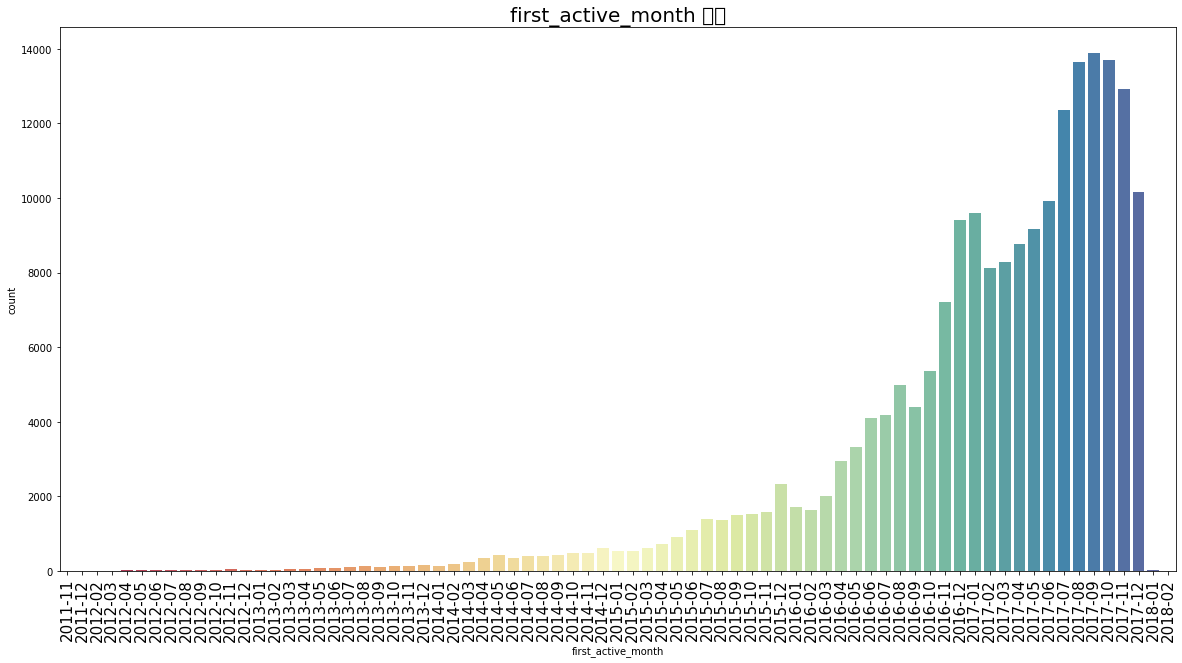

In [6]:
plt.figure(figsize=(20,10))
plt.title("first_active_month 분포",size=20)
first_active_month=sns.countplot(x=train.first_active_month,palette='Spectral',
            order = np.sort(train.first_active_month.value_counts().index))
first_active_month.set_xticklabels(first_active_month.get_xticklabels(), rotation=90, size=15)

Wall time: 6.23 s


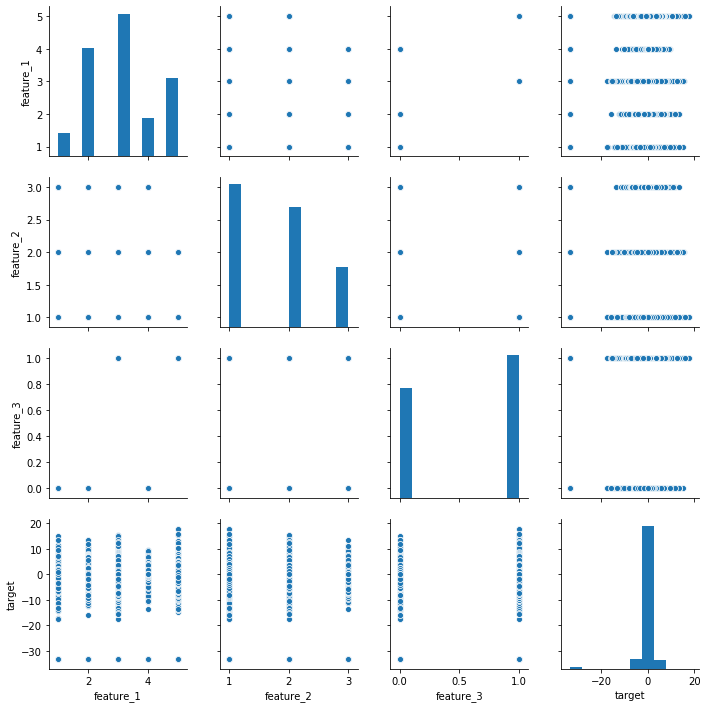

In [7]:
%%time
sns.pairplot(train)

In [8]:
train.columns

Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target'],
      dtype='object')

C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 52649 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\anaconda_c\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


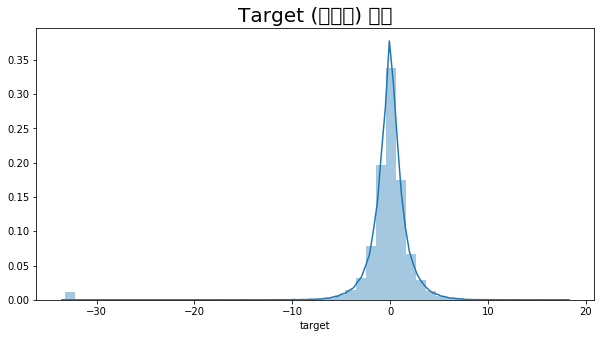

In [9]:
plt.figure(figsize=(10,5))
plt.title("Target (충성도) 분포",size=20)
sns.distplot(train.target)

In [10]:
df = pd.DataFrame(train)
print(df['target'])

0        -0.820283
1         0.392913
2         0.688056
3         0.142495
4        -0.159749
5         0.871585
6         0.230129
7         2.135850
8        -0.065406
9         0.300062
10       -1.029562
11       -2.433761
12        1.304452
13        0.093633
14        1.597750
15        1.010937
16        1.132236
17        0.318062
18        0.757280
19        0.334337
20        1.442726
21        4.747602
22        0.464404
23       -0.529658
24       -0.084951
25        1.525862
26       -0.090744
27       -1.361720
28        0.727093
29        1.143863
            ...   
201887    0.193238
201888    0.076491
201889   -0.024215
201890    0.666202
201891   -1.327112
201892    0.130062
201893    1.047496
201894   -0.882748
201895   -0.549372
201896   -0.616658
201897   -0.133215
201898   -3.360124
201899   -2.702214
201900   -0.151734
201901   -1.743145
201902    1.001529
201903    0.251799
201904   -0.401386
201905    1.182343
201906    0.279741
201907    0.145590
201908    0.

In [11]:
df = pd.DataFrame(train)
print(df['target'])

0        -0.820283
1         0.392913
2         0.688056
3         0.142495
4        -0.159749
5         0.871585
6         0.230129
7         2.135850
8        -0.065406
9         0.300062
10       -1.029562
11       -2.433761
12        1.304452
13        0.093633
14        1.597750
15        1.010937
16        1.132236
17        0.318062
18        0.757280
19        0.334337
20        1.442726
21        4.747602
22        0.464404
23       -0.529658
24       -0.084951
25        1.525862
26       -0.090744
27       -1.361720
28        0.727093
29        1.143863
            ...   
201887    0.193238
201888    0.076491
201889   -0.024215
201890    0.666202
201891   -1.327112
201892    0.130062
201893    1.047496
201894   -0.882748
201895   -0.549372
201896   -0.616658
201897   -0.133215
201898   -3.360124
201899   -2.702214
201900   -0.151734
201901   -1.743145
201902    1.001529
201903    0.251799
201904   -0.401386
201905    1.182343
201906    0.279741
201907    0.145590
201908    0.

In [12]:
max_num = 1
min_num = 1
 
for num in range(201916):
    ## Find Max Number
    if max_num < train.target[num]:
        max_num = train.target[num]
 
    ## Find Min Number
    if min_num > train.target[num]:
        min_num = train.target[num]
        
print("Max Number: ", max_num)
print("min Number: ", min_num)


Max Number:  17.9650684
min Number:  -33.21928095


In [13]:
df [ df ['target'].isin(['-33.21928095'])]

,first_active_month,card_id,feature_1,feature_2,feature_3,target
64,2017-09,C_ID_8186f3fcc1,3,1,1,-33.219281
92,2015-05,C_ID_b9379a30ea,3,3,1,-33.219281
125,2015-10,C_ID_e9120f535c,3,3,1,-33.219281
151,2017-03,C_ID_65715cb80d,4,2,0,-33.219281
225,2017-01,C_ID_ae77d244b6,2,1,0,-33.219281
248,2015-07,C_ID_c4262c902e,5,1,1,-33.219281
254,2017-03,C_ID_6a2c823e5f,2,1,0,-33.219281
386,2017-06,C_ID_98e1cb10b6,2,3,0,-33.219281
467,2017-03,C_ID_eb8175721a,4,1,0,-33.219281
515,2016-04,C_ID_a2580006bf,4,2,0,-33.219281


In [14]:
history_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [ ]:
###plt.figure(figsize=(20,10))
###plt.title("purchase 분포",size=20)
###purchase_amount=sns.countplot(x=history_trans.purchase_amount,palette='Spectral',
            ###order = np.sort(.value_counts().index))
###purchase_amount.set_xticklabels(purchase_amount.get_xticklabels(), rotation=90, size=15)

In [15]:
df = pd.DataFrame(history_trans)
print(df['authorized_flag'])

0           Y
1           Y
2           Y
3           Y
4           Y
5           Y
6           Y
7           Y
8           Y
9           Y
10          Y
11          Y
12          Y
13          Y
14          Y
15          Y
16          Y
17          Y
18          Y
19          Y
20          Y
21          Y
22          Y
23          Y
24          Y
25          Y
26          Y
27          Y
28          Y
29          Y
           ..
29112331    Y
29112332    Y
29112333    Y
29112334    Y
29112335    Y
29112336    Y
29112337    Y
29112338    Y
29112339    Y
29112340    Y
29112341    Y
29112342    Y
29112343    Y
29112344    Y
29112345    Y
29112346    Y
29112347    Y
29112348    Y
29112349    Y
29112350    Y
29112351    Y
29112352    Y
29112353    Y
29112354    Y
29112355    Y
29112356    Y
29112357    Y
29112358    Y
29112359    Y
29112360    Y
Name: authorized_flag, Length: 29112361, dtype: object


In [16]:
df [ df ['authorized_flag'].isin(['N'])]

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
115,N,C_ID_4e6213e9bc,88,N,0,A,842,M_ID_22c9cfa265,-10,-0.730379,2017-04-07 12:58:09,1.0,16,37
132,N,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-5,-0.723782,2017-09-17 22:40:27,1.0,16,16
148,N,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-5,-0.723782,2017-09-17 22:40:26,1.0,16,16
168,N,C_ID_4e6213e9bc,333,N,0,A,605,M_ID_c2ae34c2ef,0,-0.664262,2018-02-20 10:57:50,1.0,9,2
213,N,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-7,-0.738132,2017-07-08 07:33:31,1.0,16,34
294,N,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_21e1552dab,-11,-0.734135,2017-03-22 15:53:08,1.0,16,37
306,N,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-7,-0.738132,2017-07-08 07:32:30,1.0,16,34
365,N,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-7,-0.738132,2017-07-08 07:32:49,1.0,16,34
368,N,C_ID_4e6213e9bc,88,N,0,A,278,M_ID_21e1552dab,-11,-0.734135,2017-03-22 15:52:52,1.0,16,37
400,N,C_ID_5037ff576e,322,N,1,B,278,M_ID_b61c7d1be0,-3,-0.595260,2017-09-07 20:57:19,3.0,11,37
